# Does Heavy Alcohol Usage Affect Academics? : EDA and Prediction 
Data from --> https://www.kaggle.com/datasets/uciml/student-alcohol-consumption



# INTRODUCTION:


Hi, my name is Tejas and I am a student studying Data Science. This notebook serves as both practice and a demonstration for my skills. Please give advice and constructive criticism on how to improve. Thank you! The data set we will be using for this NB is "Student Alcohol Consumption" by UC Irvine Machine Learning. This dataset features a variety of interesting features that are supposed to be used to predict student's final exam scores.

Anyway, let's get started. Firstly, this dataset comes with two separate datasets. One is the student's math scores, and the other is a portuguese scores dataset, however the variables are the exact same. I will be almost entirely focused on the math dataset. 
Here are some of the variables that are covered in this dataset: 

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)\
- sex - student's sex (binary: 'F' - female or 'M' - male)\
- age - student's age (numeric: from 15 to 22)\
- address - student's home address type (binary: 'U' - urban or 'R' - rural)\
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)\
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)\
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)\
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Additionally, here are some of the more interesting attributes included in the study: 

- romantic - with a romantic relationship (binary: yes or no)\
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)\
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

You can read about the rest of the variables here: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption 

Our task is to do some basic EDA (Exploratory Data Analysis) with the data and maybe graph some visualizations, so we can see what the data is saying. And then, our second task is to try and make some predictions using the data and create models so that we can take things away from the data and apply them.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-alcohol-consumption/student-mat.csv
/kaggle/input/student-alcohol-consumption/student-merge.R
/kaggle/input/student-alcohol-consumption/student-por.csv


# Here we begin our analysis. 
**This analysis has two parts:**\
    Part 1 --> Exploratory Data Analysis (what the data says)\
    Part 2 --> Prediction and Application (what the data does...)

# *PART 1: EDA*
EDA, or exploratory data analysis, is the portion of this notebook where we try to interpret what this data is saying. EDA is also an important part of the process even though there is no machine learning happening. During EDA, we: 
* Clean the data
* Visualize the data
* Interpret the data
* and more... 

\
\
I also believe that it is important as data scientists to have questions in hand before we even begin studying the data. Here are some potential questions we can ask: 

* What makes a good student? 
* How does alcohol affect academic success? 
* Does having separated parents affect academic performance? 
* Are students invovled in extracurriculars students drinking less? 
* Does having a girlfriend make you a better student?  


  
  





In [2]:
#first 5 rows of DataFrame
df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#last 5 rows of DataFrame
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [4]:
#columns in DataFrame
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
#info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
#how many women and men are in our study...
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Ages of Study (students)'}>

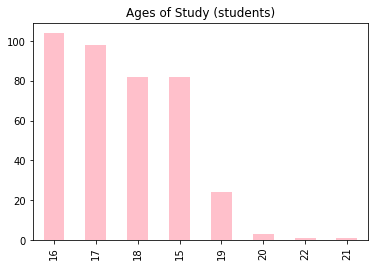

In [7]:
#age distribution of our students...
df['age'].value_counts(sort = True).plot(kind = 'bar', color = 'pink', title = 'Ages of Study (students)')

<AxesSubplot:title={'center':'Students Studytime (Rated 1-4)'}>

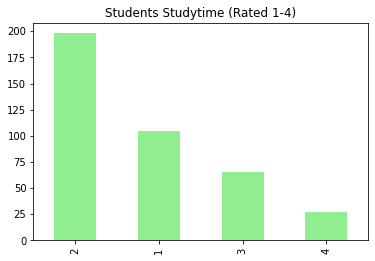

In [8]:
#studytime distribution of our students...
df['studytime'].value_counts().plot(kind = 'bar', title = 'Students Studytime (Rated 1-4)', color = 'lightgreen')

Text(0.5, 0, 'Score / 20')

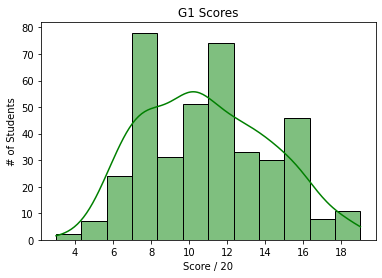

In [9]:
fundf = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
df = fundf
#score distributions of the three exams to get us started

#G1
sns.histplot(data = fundf, x = fundf['G1'], kde = True, color = 'Green')
sns.set(rc={'figure.figsize':(14.7,8.27)})
plt.title("G1 Scores")
plt.ylabel("# of Students")
plt.xlabel("Score / 20")

Text(0.5, 0, 'Score / 20')

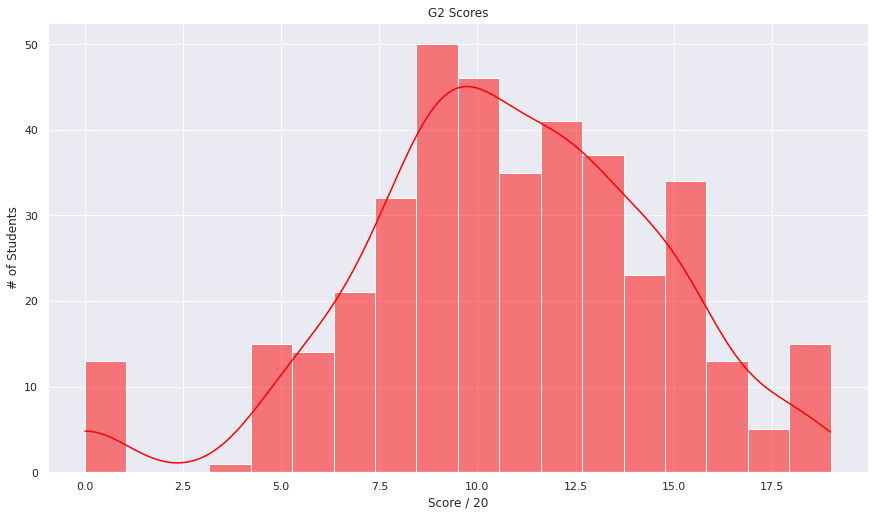

In [10]:
#G2
sns.histplot(data = fundf, x = df['G2'], kde = True, color = 'red')
sns.set(rc={'figure.figsize':(15,8.27)})
plt.title("G2 Scores")
plt.ylabel("# of Students")
plt.xlabel("Score / 20")

Text(0.5, 0, 'Score / 20')

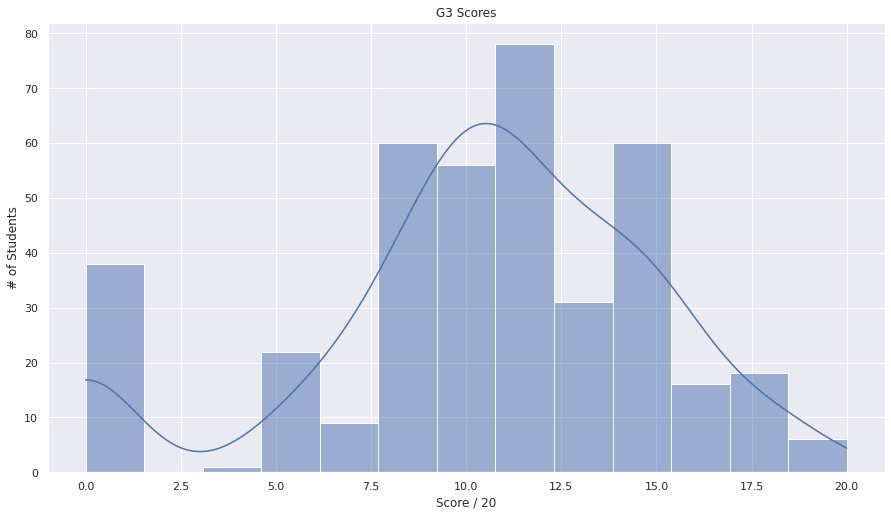

In [11]:
#G3 
sns.histplot(data = fundf, x = df['G3'], kde = True)
sns.set(rc={'figure.figsize':(19.7,8.27)})
plt.title("G3 Scores")
plt.ylabel("# of Students")
plt.xlabel("Score / 20")

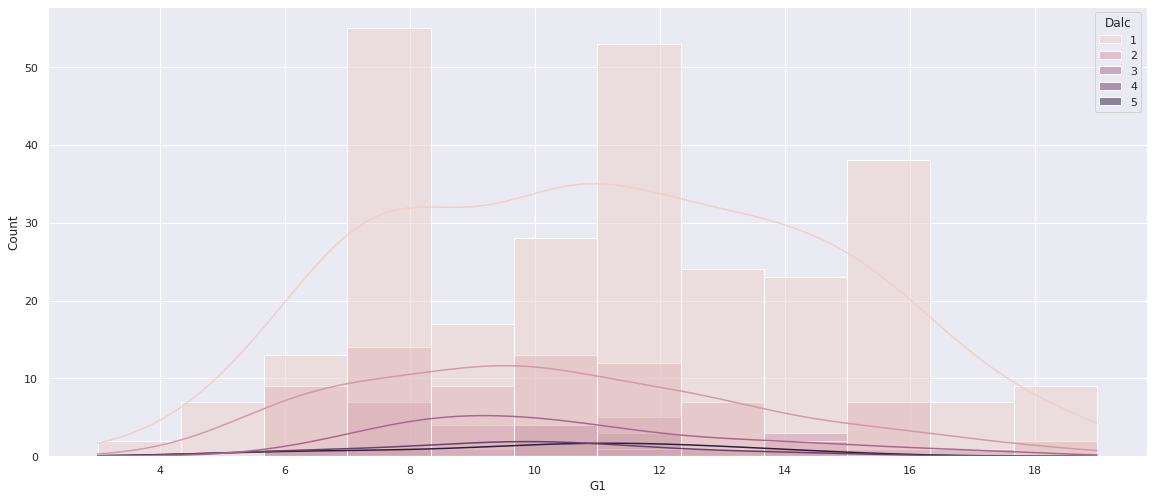

In [12]:
#G1 scores separated by Dalc
sns.histplot(data = fundf, x = df['G1'], kde = True, hue = df['Dalc'].sort_values(ascending = True))
sns.set(rc={'figure.figsize':(19.7,8.27)})

In [13]:
# our dataFrame
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


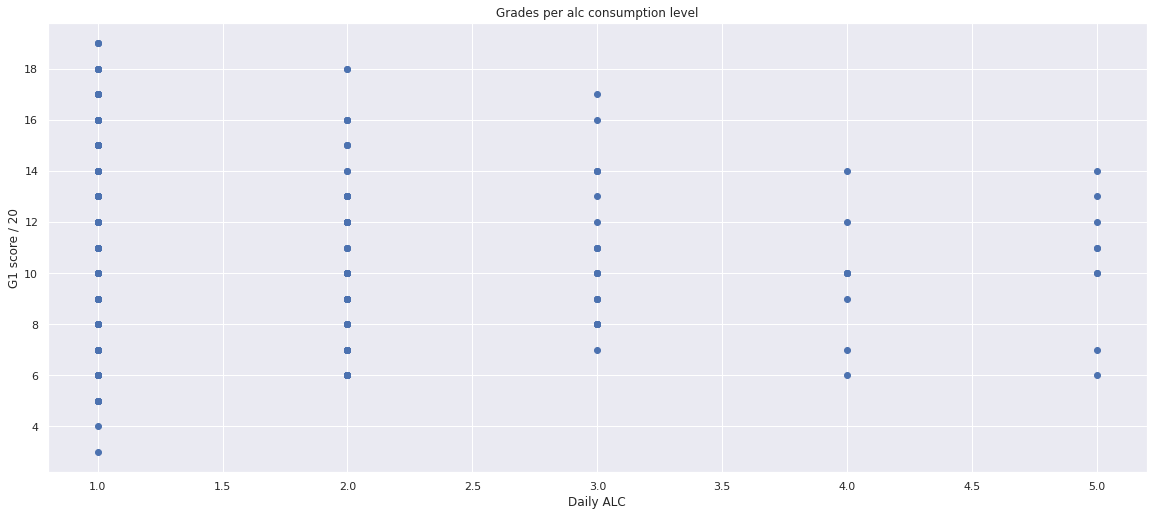

In [14]:
df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')

#Dalc -> dailyalc consumption
#Walc -> weekendalc consumption

import matplotlib.pyplot as plt
#plt.scatter(df['G1'], df['Dalc'])
plt.scatter(df['Dalc'],df['G1'])
plt.title('Grades per alc consumption level')
plt.xlabel('Daily ALC'), plt.ylabel('G1 score / 20')

high_alc = df[df['Dalc'] >= 3]

Immediately we notice that none of the bottom performers are high consumers of alcohol, if high weekday alcohol usage is the measure of that. This is slightly strange, but I'm sure there are many potential reasons for why someone could be one of the worst performers on their math exam. 

This is also a rough metric since we are only assessing G1, the first exam. 

I define anyone who has a **Dalc** --> that is daily alcohol consumption rating,   
of **above a 3** as
   **high_alc**. 

In [15]:
high_alc = df[df['Dalc'] >= 3]

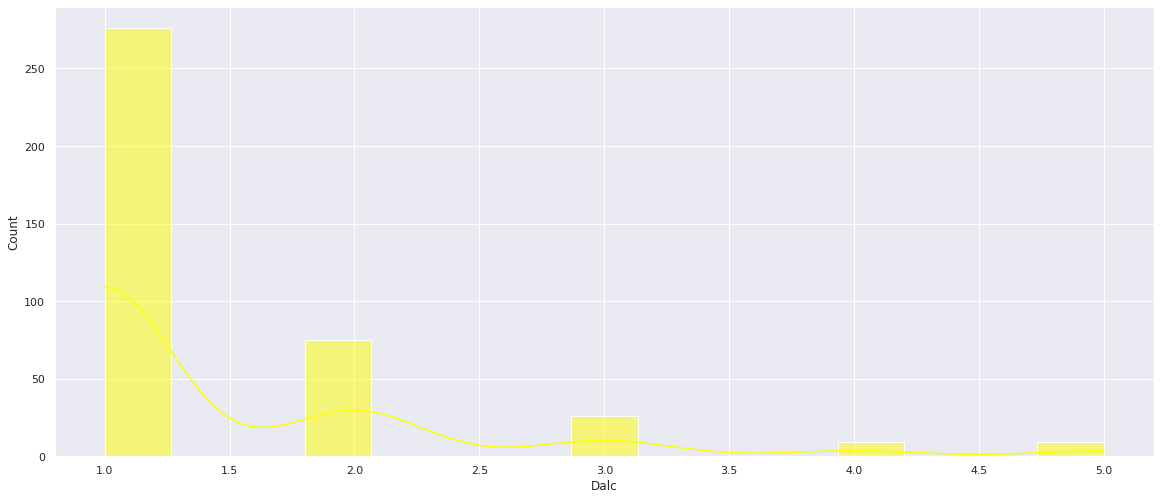

In [16]:
# here is the breakdown of dalc (daily alcohol consumption) across the student population
sns.histplot(df['Dalc'], color = 'yellow', kde = True)
sns.set(rc={'figure.figsize':(19.7,8.27)})

In [17]:
# more of above
# 5 is the highest
df.Dalc.value_counts(ascending = False)

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [18]:
#average test scores per three periods of exams
df['test_avg'] = (df['G1'] + df['G2'] + df['G3']) / 3
high_alc = df[df['Dalc'] >= 3]
low_alc = df[df['Dalc'] <= 2]

#erasing 0s
high_alc = high_alc[high_alc.G1 != 0]
high_alc = high_alc[high_alc.G2 != 0]
high_alc = high_alc[high_alc.G3 != 0]

low_alc = low_alc[low_alc.G1 != 0]
low_alc = low_alc[low_alc.G2 != 0]
low_alc = low_alc[low_alc.G3 != 0]

print("high_alc student scores: " + str(high_alc['test_avg'].mean()))
print("NOT high_alc student scores: " + str(low_alc['test_avg'].mean()))

high_alc student scores: 10.542635658914728
NOT high_alc student scores: 11.498938428874736


As you can see students labeled as low_alc had almost a 5% higher test average over three exams!

Text(0.5, 1.0, 'Daily Alcohol Consumption vs G1 scores histograms')

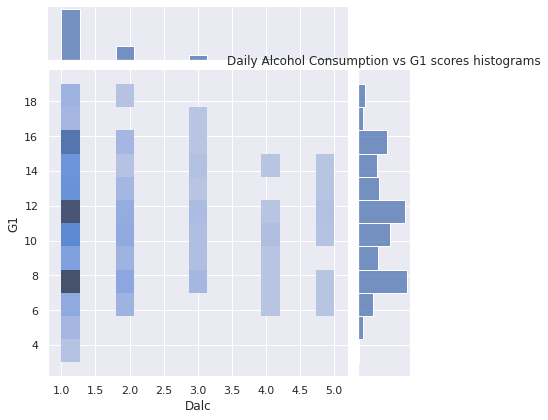

In [19]:
x = df['Dalc']
y = df['G1']
del x, y
sns.jointplot(x = df['Dalc'], y = df['G1'], kind = 'hist')
sns.set(rc={'figure.figsize':(19.7,8.27)})
plt.title("Daily Alcohol Consumption vs G1 scores histograms")
#again, from the data, there is very little being
#implied about test scores directly relating to
#alc consumption

In [20]:
#forfun!
#does having a partner make you a better/worse student
df['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [21]:
yes = df[df['romantic'] == 'yes']['test_avg'].mean()
no = df[df['romantic'] == 'no']['test_avg'].mean()
print("having a partner averages "+ str(yes))
print("NOT  " + str(no))

having a partner averages 10.143939393939394
NOT  10.94803548795944


In [22]:
inv = df[df['activities'] == "yes"]
noninv = df[df['activities'] == "no"]
print("involved students: " + str(round(inv['Dalc'].mean(), 3)))
print("versus noninvolved students daily alcohol consumption: " + str(round(noninv['Dalc'].mean(),3)))

involved students: 1.423
versus noninvolved students daily alcohol consumption: 1.541


In [23]:
div_parents = df[df['Pstatus'] == 'A']
div_parents = div_parents[div_parents.G1 != 0]
div_parents = div_parents[div_parents.G2 != 0]
div_parents = div_parents[div_parents.G3 != 0]
print("apart parents student scores: " + str(div_parents['test_avg'].mean()))

tog_par = df[df['Pstatus'] == 'T']
tog_par = tog_par[tog_par.G1 != 0]
tog_par = tog_par[tog_par.G2 != 0]
tog_par = tog_par[tog_par.G3 != 0]
print("together parents student scores: " + str(tog_par['test_avg'].mean()))

apart parents student scores: 11.53846153846154
together parents student scores: 11.364779874213836


**Do students with separated parents drink more?🍷**

Text(0.5, 1.0, 'Students with Parents Who Live Together')

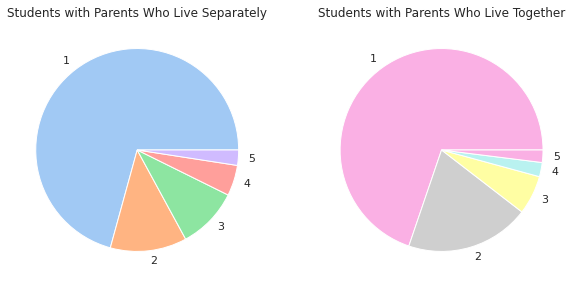

In [24]:
#feature engineering and viz for pstatus x dalc
sep = df[df['Pstatus'] == 'A']
tog = df[df['Pstatus'] == 'T']
sep_count = sep['Dalc'].value_counts(normalize = True)
tog_count = tog['Dalc'].value_counts(normalize = True)
#insert pie chart of these two here to show proportions

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

colors = sns.color_palette('pastel')[0:5]
colors2 = sns.color_palette('pastel')[6:11]

ax1.pie(sep_count, labels = sep_count.index, colors = colors)
ax1.set_title('Students with Parents Who Live Separately')
ax2.pie(tog_count, labels = sep_count.index, colors = colors2)
ax2.set_title('Students with Parents Who Live Together')

In [25]:
#mean alconsumption of those with separated parents
parents_alc = df[df['Pstatus'] == 'A']
p_a = parents_alc['Dalc'].mean()
p_b = df['Dalc'].mean()
print("separated parents dalc vals " + str(round(p_a, 3)) 
      + " vs. those with nonseparated parents " + str(round(p_b,3)))

separated parents dalc vals 1.561 vs. those with nonseparated parents 1.481


This is an interesting comparison. Those who have separated parents
seem to drink more alcohol than those who don't. I
will explore this later. 

I think that even though this dataset is aimed to calculate how 
alcohol consumption affects students' math exam scores,
it is maybe more relevant to see how these other variables
affect alcohol consumption in the first place.

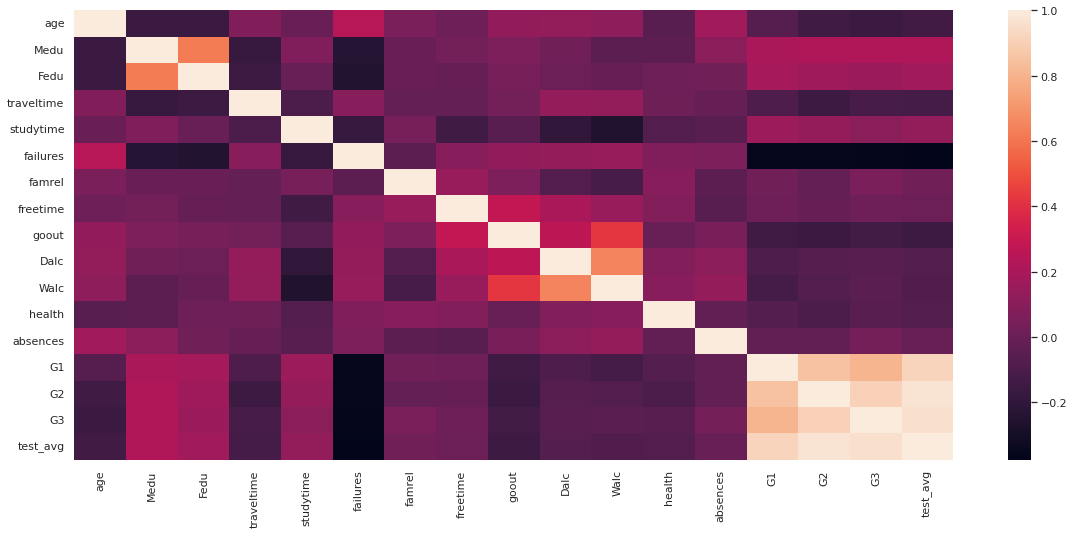

In [26]:
corrmatrix = df.corr()
plt.show()
sns.heatmap(corrmatrix)
sns.set(rc={'figure.figsize':(17,8.27)})

**What makes a good student?📚**

In [27]:
#or at least a high test scorer..
corrmatrix['test_avg'].sort_values()

failures     -0.375759
goout        -0.154511
age          -0.134589
traveltime   -0.128197
Walc         -0.088025
health       -0.080380
Dalc         -0.072508
absences     -0.005909
freetime      0.003773
famrel        0.021653
studytime     0.134565
Fedu          0.175852
Medu          0.224260
G1            0.919386
G3            0.959873
G2            0.967999
test_avg      1.000000
Name: test_avg, dtype: float64

In [28]:
corrmatrix['G1'].sort_values()

failures     -0.354718
goout        -0.149104
Walc         -0.126179
Dalc         -0.094159
traveltime   -0.093040
health       -0.073172
age          -0.064081
absences     -0.031003
freetime      0.012613
famrel        0.022168
studytime     0.160612
Fedu          0.190270
Medu          0.205341
G3            0.801468
G2            0.852118
test_avg      0.919386
G1            1.000000
Name: G1, dtype: float64

As you can see from this heatmap, one of the best predictors of G3
test scores is G1 or G2 scores. IE, the best predictor for a students
test scores is their previous test scores. Additionally, from heatmap, we can
see that Mother and Father education is the next best predictor of exam scores as a whole

**Mother and Father education are more correlated with test scores
than studytime itself!!**

In [29]:
medug1 = corrmatrix['Medu']['G1']
fedug1 = corrmatrix['Fedu']['G1']
studtimeG1 = corrmatrix['studytime']['G1']
g2ong1 = corrmatrix['G2']['G1']
print("Correlations of important variables on G1 scores\n")
print("Mother education on G1 score = " + str(round(medug1,2)))
print("Father education on G1 score = " + str(round(fedug1,2)))
print("Study time on G1 score = " + str(round(studtimeG1,2)))
print("G2score on G1 score = " + str(round(g2ong1,2)))

Correlations of important variables on G1 scores

Mother education on G1 score = 0.21
Father education on G1 score = 0.19
Study time on G1 score = 0.16
G2score on G1 score = 0.85


Variables that correlative very negatively: 

failures     -0.354718
goout        -0.149104
Walc         -0.126179
Dalc         -0.094159
traveltime   -0.093040
Name: G1, dtype: float64


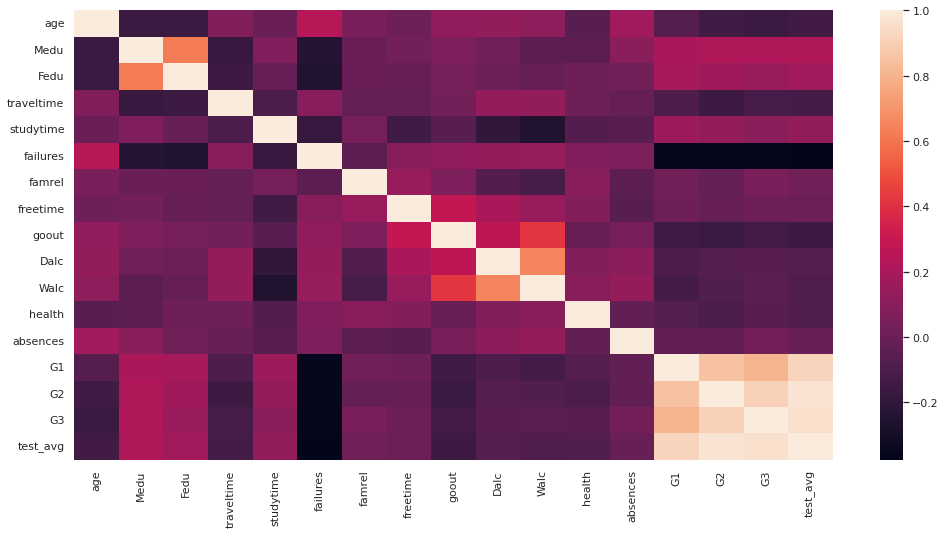

In [30]:
print("Variables that correlative very negatively: \n")
sns.heatmap(corrmatrix)
print(corrmatrix['G1'].sort_values().head())

The heatmap also shows which values are highly negatively correlated. This is just
as important because they can be good predictors as well. 

For example, one of the biggest factors that negatively-correlates with class failures
and test scores is parents education. The more educated your parents are, the 
less likely you are to fail a class or even perform poorly on your exams.

Going out is also deeply correlated with failures and with low scores on exams. On the contrary,
traveltime to and from campus is also strongly correlated.

This heatmap has lost some variables since they are categorical. For example,
Parent separation status, which I think would have a large impact on either 
alcohol usage or absences or even test scores. 

In [31]:
colnames = df.columns
i = len(df['Pstatus'])
newcol = []
j = 0
while j < i:
    if(df['Pstatus'][j] == 'T'):
        newcol.append(0)
    if(df['Pstatus'][j] == 'A'):
        newcol.append(1)
    j += 1
df['Pstatus1'] = newcol
corrmatrix2 = df.corr()
plt.show()
#sns.heatmap(corrmatrix2)
#
pstatusonG1 = corrmatrix2['Pstatus1'].sort_values()
#This variable --^ is a sorted container of the most correlated values with parental residential status


In [32]:
pstatusonG1

freetime     -0.038717
age          -0.029598
traveltime   -0.028265
famrel       -0.025179
studytime    -0.024294
health       -0.022307
Walc         -0.006045
goout        -0.003459
failures      0.003339
G1            0.016868
Dalc          0.030590
G2            0.041382
test_avg      0.043048
G3            0.058009
Fedu          0.088730
Medu          0.123565
absences      0.134937
Pstatus1      1.000000
Name: Pstatus1, dtype: float64

I found that parental relationship status was an interesting metric to track in this dataset. I mapped parents who were apart as a 1, and those who were together as a 0. (Solely for coherence) The other statistic that this variable is most correlated with is absences. There is a negative correlation between students who have apart parents and their attendance\
In terms of what this variable is correlated with in the negative department: freetime, age, traveltime, and family relationship.\
This is clearly an influential variable and will be important for our models later.

In [33]:
#variables most correlated with Daily Alcohol Consumption: WALC, GOOUT, freetime, etc...
corrmatrix2['Dalc'].sort_values()

studytime    -0.196019
G1           -0.094159
famrel       -0.077594
test_avg     -0.072508
G2           -0.064120
G3           -0.054660
Fedu          0.002386
Medu          0.019834
Pstatus1      0.030590
health        0.077180
absences      0.111908
age           0.131125
failures      0.136047
traveltime    0.138325
freetime      0.209001
goout         0.266994
Walc          0.647544
Dalc          1.000000
Name: Dalc, dtype: float64

In [34]:
#perfect amount to drink?
hold = df[['Dalc', 'Walc', 'test_avg']]
p = hold[['Dalc', 'test_avg']].groupby('Dalc')
p.mean()

,test_avg
Dalc,
1,10.945652
2,9.857778
3,10.538462
4,9.814815
5,10.629630


In [35]:
p = hold[['Walc', 'test_avg']].groupby('Walc')
p.mean()

,test_avg
Walc,
1,10.988962
2,10.654902
3,10.858333
4,9.810458
5,10.154762


In [36]:
#this is a multilevel dataframe (dF with multilevel index) 
#    that shows test score average per group
#    it also shows how many people are in each group
#    it ALSO shows the failure averages per group

p = hold[['Walc', 'Dalc', 'test_avg']].groupby(['Dalc', 'Walc'])
p = p.mean()
p['count'] = hold[['Walc', 'Dalc', 'test_avg']].groupby(['Dalc', 'Walc']).count()
p['failures'] = df[['Walc', 'Dalc', 'failures']].groupby(['Dalc', 'Walc']).mean()
p

test_avg  count  failures
Dalc Walc                            
1    1     11.033333    150  0.253333
     2     10.815385     65  0.200000
     3     11.134921     42  0.166667
     4     10.311111     15  0.200000
     5     10.166667      4  1.500000
2    1      4.333333      1  0.000000
     2      9.870370     18  0.722222
     3     10.885057     29  0.344828
     4      8.757576     22  0.590909
     5      9.800000      5  1.400000
3    2     12.666667      1  0.000000
     3     10.000000      8  1.125000
     4     10.939394     11  0.272727
     5     10.166667      6  0.333333
4    2     12.333333      1  0.000000
     3      5.333333      1  1.000000
     4     10.888889      3  0.333333
     5      9.500000      4  0.500000
5    5     10.629630      9  0.444444

In [37]:
#There are 9 students who have Dalc = 5
heavy_drinkers = df[df['Dalc'] == 5]
heavy_drinkers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,test_avg,Pstatus1
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,5,5,5,5,16,10,12,11,11.000000,0
61,GP,F,16,U,GT3,T,1,1,services,services,...,5,5,5,5,6,10,8,11,9.666667,0
66,GP,M,15,U,GT3,A,4,4,other,services,...,3,5,5,3,4,13,13,12,12.666667,1
100,GP,M,16,U,GT3,T,4,4,services,services,...,5,5,5,4,14,7,7,5,6.333333,0
223,GP,M,18,U,GT3,T,2,2,other,other,...,3,5,5,4,0,12,13,13,12.666667,0
236,GP,M,17,U,LE3,T,2,2,other,other,...,2,5,5,4,4,14,13,13,13.333333,0
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,5,5,1,16,6,8,8,7.333333,0
327,GP,M,17,R,GT3,T,2,2,services,other,...,5,5,5,4,8,11,10,10,10.333333,0
349,MS,M,18,R,GT3,T,3,2,other,other,...,5,5,5,5,10,11,13,13,12.333333,0


In [38]:
#here are the top 5 multilevel indexes for Dalc, Walc scores
p[p['count'] > 1].sort_values(by = 'test_avg', ascending = False).head()
#students with a Dalc of 1 and a Walc of 3 had the highest average

test_avg  count  failures
Dalc Walc                            
1    3     11.134921     42  0.166667
     1     11.033333    150  0.253333
3    4     10.939394     11  0.272727
4    4     10.888889      3  0.333333
2    3     10.885057     29  0.344828

In [39]:
#students with more than 20 absences 
more20 = df[df['absences']>20].test_avg.mean()
less20 = df[df['absences']<20].test_avg.mean()
print("more than 20 absences " + str(more20))
print("NOT " + str(less20))

more than 20 absences 10.444444444444445
NOT 10.676418439716311


In [40]:
#this is the r^2 or correlation coefficient of absences on test_avgs 
corrmatrix['absences'].pow(2)['test_avg']
#in other words, 0 
#--> this implies that absences have no impact on test_averages for students!

3.4913989909141734e-05

In [41]:
#schoolsupport --> tutoring
a = df[df['schoolsup'] == 'yes']['test_avg'].mean()
b = df[df['schoolsup'] == 'no']['test_avg'].mean()
print("receiving tutoring " + str(a))
print("NOT " + str(b))

receiving tutoring 9.359477124183007
NOT 10.875


Here we see a huge disparity which also gives us a normalizer for what a big disparity between two groups actually is. Students who receive tutoring have an average of 9.35/20, whereas those who don't have an average of 10.875/20. At least on first glance, this appears to be a statistically significant difference. We now know that a 1.5 point gap between two groups is relatively big.

In [42]:
#advanced paid classes in subject matter
a = df[df['paid'] == 'yes']['test_avg'].mean()
b = df[df['paid'] == 'no']['test_avg'].mean()
print("receiving paid classes outside class for math " + str(a))
print("NOT " + str(b))

receiving paid classes outside class for math 11.03867403314917
NOT 10.37538940809969


# Part 2: Prediction and Application
Now it's time to use python to build some ML models to see if we can make any sort of predictions using our data. One of the main predictions the source asks us to make is final exam scores, so let's see if we can build a model that predicts those with a high degree of accuracy. 

In [43]:
# Number 1: Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(df['Dalc']).reshape((-1, 1))
y = df['G1']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0089


As you can see from our rough linear regression, the Dalc variable has a very weak effect on students G1 Math exam scores. 

Let's try two of our strongly correlated variables as inputs for our Linear Regression Model. This time we will use two variables so we will be conducting a Multiple Linear Regression. 

R2 score or the coefficient of determination is defined as the portion of the variation in one variable that is explained by one (or more) other variables in the data. So a high r2 score means that a large portion of the data's variation is explained by that variable. In Machine Learning, a good r2 score means our model is well trained and can explain our dataset well. A perfect r2 score is r2 = 1 and a very bad r2 score is r2 = 0. 

In [44]:
mmodel = LinearRegression()
x2 = df[['Medu', 'Fedu']]
x2 = np.array(x2).reshape(-1, 2)
y = df['G1']
mmodel.fit(x2, y)
mr2 = mmodel.score(x2, y)
print("Coeff of determination: " + str(round(mr2,4)))

Coeff of determination: 0.0485


In [45]:
nmodel = LinearRegression()
x3 = df[['Medu', 'Fedu', 'G2', 'studytime']]
x3 = np.array(x3).reshape(-1, 4)
y = df['G1']
mmodel.fit(x3, y)
mr2 = mmodel.score(x3, y)
print("Coeff of determination: " + str(round(mr2,4)))

Coeff of determination: 0.7311


**Linear Regression** is a form of regression where independent variables are assessed on their ability to predict a certain target variable. In our case, we have a multiple linear regression because we have multiple independent input variables, and we have a target vector of  df['G1'] \
which is the vector of student's G1 exam scores.  

These are some examples of what Linear Regressions we can derive from this dataset. One using Mother's Education, Father's Education, Studytime, and their G2 scores turned out to be the most effective. Obviously a huge reason for htis model being effective is that we use their G2 scores which are highly correlated with the rest of their exam scores. 

In [46]:
lmodel = LinearRegression()
x4 = df[['G2', 'G3', 'Fedu', 'Medu']]
x4 = np.array(x4).reshape(-1, 4)
y = df['G1']
mmodel.fit(x4, y)
mr2 = mmodel.score(x4, y)
print("Coeff of determination: " + str(round(mr2,4)))

Coeff of determination: 0.7339


In [47]:
# Number 2: Logistic Regression 

#using same training input: G2, G3, Fedu, Medu
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=10000).fit(x4, y)
log.score(x4, y)

0.34430379746835443

In [48]:
#using solely Dalc for Logistic Regression model
x = df['Dalc']
x = np.array(x).reshape(-1,1)
y = df['G1']
log2 = LogisticRegression().fit(x, y)
log2.score(x,y)

0.13164556962025317

Logistic Regression models seem to be rather ineffective at predicting these test scores.

We can determine what model is good based on what score we initially get. HOWEVER, this score is not a metric of the actual accuracy of this model, but rather what this model can describe about the current dataset we have. If we were to take this model and apply it to the portuguese scores we would get slightly different results. 

In [49]:
# Number 3: Support Vector Machines
from sklearn import svm
inp = df[['G2', 'G3', 'Fedu', 'Medu']]
out = df['G1']
svmt = svm.SVR().fit(inp,out)
svmt.score(inp, out)

0.8220122468860729

In [50]:
p = df[['G2', 'G3']]
svm2 = svm.SVR().fit(p, out)
score1 = svm2.score(p, out)

q = df['G2']
w = np.array(q).reshape(-1,1)
svm3 = svm.SVR().fit(w, out)
score2 = svm3.score(w, out)

l = df['G3']
ne = np.array(l).reshape(-1,1)
svm4 = svm.SVR().fit(ne, out)
score3 = svm4.score(ne, out)
print("Support vector regression with G2 and G3 on G1: " + str(round(score1, 5)))
print("Support vector regression with JUST G2 on G1: " + str(round(score2, 5)))
print("Support vector regression with JUST G3 on G1: " + str(round(score3, 5)))

Support vector regression with G2 and G3 on G1: 0.82049
Support vector regression with JUST G2 on G1: 0.81697
Support vector regression with JUST G3 on G1: 0.78972


In [51]:
# For example
# look at what the model predicts someone who received a 20/20 on G2 and G3 Exams will get:

predictThis = [[20, 20] ,[0,0], [10,10]]
ans = svm2.predict(predictThis)
ans[0:5]

array([16.32717536,  7.10050721,  9.9401869 ])

--^ Above is what our model predicts a student will receive based on their G2 and G3 scores. 

In [52]:
# Number 4: Naive Bayes

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
x4 = df[['G2', 'G3', 'Fedu', 'Medu']]
gnbx = gnb.fit(x4, y)
gnbx.score(x4,y) 

0.3139240506329114

In [53]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nbb = MultinomialNB()
x4 = df[['G2', 'G3', 'Fedu', 'Medu']]
nbbx = nbb.fit(x4, y)
nbbx.score(x4,y) 

0.17215189873417722

Naive bayes is typically a classification algorithm, so as you can see it performs poorly for our regressive tasks...

In [54]:
#taking some time to build a model that uses Dalc as a target variable without Walc
df2 = df[['Dalc', 'Walc', 'Pstatus1', 'Pstatus', 'age', 'absences', 'goout', 'freetime', 'traveltime']]
xvals= df2[['absences', 'goout', 'freetime', 'traveltime', 'age',]]
yvals = df2['Dalc']

svrmod = svm.SVR().fit(xvals,yvals)
svrmod.score(xvals, yvals)

lmmod = LinearRegression().fit(xvals,yvals)
lmmod.score(xvals, yvals)

logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg = logreg.fit(xvals, yvals)
scorelog = logreg.score(xvals, yvals)
print("Our logistic regression model had a surprisingly good score of " + str(scorelog))

Our logistic regression model had a surprisingly good score of 0.7012658227848101


This was just demonstrating how a bunch of models could be incorporated using our data to predict test scores. For example, if we use our Support Vector Regression using just G3 data on G1, we have a model that has a score of 81.7%. This is obviously quite a good score, but this model was assessed without using any form of splitting the data. In other words, we tested our model with the same data that we trained our model. 

Additionally, in the real world it is unlikely we will be given a student's other test scores of the same subject in order to predict what he will get on a similar exam. Now, we will design a simple model that can use other inputs in order to predict a student's test score.

# Our task is to create a model that uses a student's first two scores (G1 and G2), along with other metrics to predict their G3 scores.

In [55]:
df3 = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
#students w zeros on G3 exam
len(df3[df3['G3'] == 0])

38

^-- How many students got a 0 on G3 exam, most likely because of No show

In [56]:
#model creation --> SVR was our best in preliminary
model_main = svm.SVR()
from sklearn.model_selection import train_test_split
df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')

#REMOVING ALL STUDENTS WHO GOT A O on FINAL EXAM
df = df[df['G3'] != 0]
X = df[['G1', 'G2', 'Fedu', 'Medu', 'studytime']]
y = df['G3']

#SUPPORT VECTOR REGRESSION
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
model_main = model_main.fit(X_train, y_train)
y_pred = model_main.predict(X_test).reshape(-1,1)
model_main.score(X_test, y_test)

0.9288949140132693

**WHAT IS SUPPORT VECTOR REGRESSION?**
Support vector regression is a supervised learning algorithm that uses support vectors in order to predict values for us. At the end of the day SVR is a form of finding the best fit line for a dataset, but in the case of our data, our best fit line becomes a hyperplane. This plane has dimensions equal to the number of features we give the training algorithm. From there the regressor calculates which model has the least marginal sum based on the support vectors. The support vectors are the vectors that have the smallest margins, and each margin is the separation between the hyperplane and that point!


In [57]:
#some predictions
#IGNORE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
#IGNORE --> THIS CELL WAS GIVING USERWARNING 

from sklearn import *
X = np.array(X_test.iloc[0]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[0]
print("The student's predicted score was " + str(pred[0]))
print("but his actual score was " + str(actual))

The student's predicted score was 12.280496168332371
but his actual score was 12


In [58]:
X = np.array(X_test.iloc[10]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[10]
print("The student's predicted score was " + str(pred[0]))
print("but his actual score was " + str(actual))

The student's predicted score was 6.6997192100989205
but his actual score was 6


In [59]:
# completely random predictions by using np.random-->randint which randomly selects an int from the range we gave it
# in our case we gave it the range of our X test vector. We then select the same int to use as the index to select from 
# our y_test vector. We then compare the y_test vector, which is the students actual G3 score, and the prediction the 
# model gets using our test data (as if a random person were to input their data)

N = np.random.randint(0, len(X_test))
X = np.array(X_test.iloc[N]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[N]
print("The student's predicted score was " + str(round(pred[0])))
print("but his actual score was " + str(round(actual)))

The student's predicted score was 16
but his actual score was 17


In [60]:
#completely random predictions
N = np.random.randint(0, len(X_test))
X = np.array(X_test.iloc[N]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[N]
print("The student's predicted score was " + str(round(pred[0])))
print("but his actual score was " + str(round(actual)))

The student's predicted score was 6
but his actual score was 6


# ^-- This is actually a freakishly good model and if you run this notebook a few times you will see how accurate the model is. This is also the first time I include rounding in this notebook :). 

Text(0.5, 1.0, 'Red line is perfect predictions')

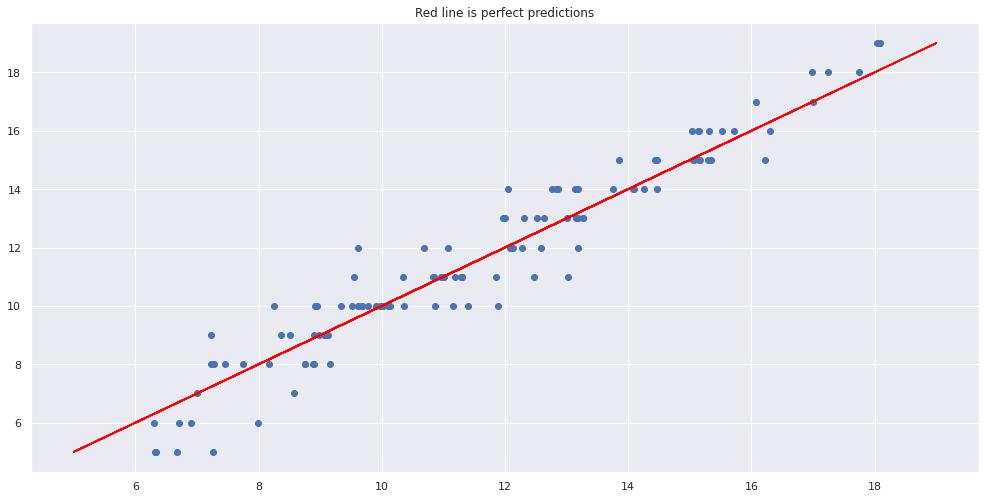

In [61]:
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color = 'red')
plt.title("Red line is perfect predictions")

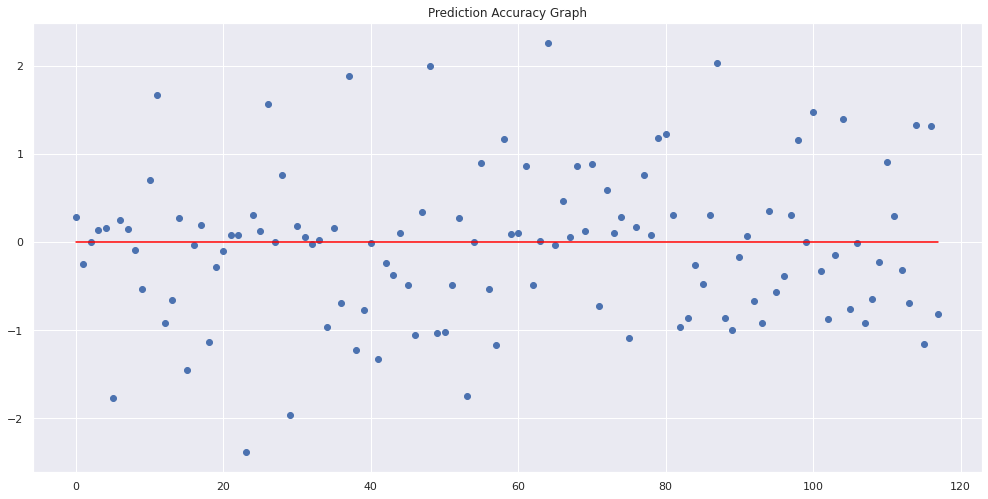

In [62]:
# difference between predicted scores using our model and actual scores.

# nothing > 2.25 and all around [0-1.3]
y_test = np.array(y_test).reshape(-1,1)
y_test.shape
plt.scatter(range(0,118), y_pred - y_test)
plt.title("Prediction Accuracy Graph")
plt.plot(range(0,118), np.zeros(118), color = 'red')

As you can see, this is quite exciting. Our model has a very high accuracy especially when considering what we are predicting. This graph shows the disparity between the G3 score each student actually got, and the score we predicted they would get when we used their data NOT including their G3 score. **The red line is the ideal position of each point.**

Most of our data points are near 0 and none are really above -2. We did, however, use G1 and G2 scores which is a little unfair because we would probably not have access to this kind of information in thie real world. However, a model that predicts a students test scores with >90% accuracy is quite impressive. This just shows us what machine learning and data science can do.

In [63]:
#some evaluation metrics for our model
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 91.0%


In [64]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_pred, y_test)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.65


In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_squared_error(y_pred, y_test))
print("The Mean Squared Error of our Model is {}".format(round(score, 2)))

The Mean Squared Error of our Model is 0.86


Thank you for reading my notebook! Hopefully it was usefull in some sort of way and any feedback is much appreciated! 